In [32]:
import glob, os
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
import matplotlib as mpl
from astropy import units as u
import time

In [33]:
import matplotlib as mpl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 200
plt.rc('font', family='serif')

In [34]:
from scipy.optimize import curve_fit
def func(x, a, b):
	return a*x+b

In [35]:
obs = 'BOAO'
# folder = 'GRB221009A_1018'
# folder = 'GRB221009A_1019'
# folder = 'GRB221009A_1020'
folder = 'GRB221009A_1022'
date = folder.split('_')[-1]

path_save = f"../{obs.lower()}/{date}"
if not os.path.exists(path_save): os.system(f"mkdir {path_save}")

print(f"obs    : {obs}\nfolder : {folder}\ndate   : {date}")

obs    : BOAO
folder : GRB221009A_1022
date   : 1022


- Dark frames

In [36]:
dkimlist0 = sorted(glob.glob(f'../1.raw/{folder}/dark*.fits'))
print(f"{len(dkimlist0)} Dark images")

280 Dark images


In [37]:
# popt, pcov = curve_fit(func, x, y)
dktbl = Table()
dktbl['image'] = [os.path.basename(inim) for inim in dkimlist0]
dktbl['exptime'] = [fits.getheader(inim)['exptime'] for inim in dkimlist0]
dktbl['median'] = [np.median(fits.getdata(inim).flatten()) for inim in dkimlist0]

xval = np.unique(dktbl['exptime'])
yval = np.array([np.median([dktbl['median'][dktbl['exptime']==exptime]]) for exptime in xval])

Bias Level : 9985.441


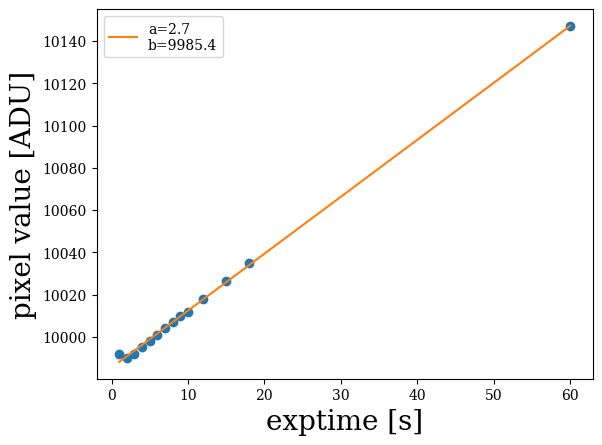

In [38]:
plt.plot(xval, yval, marker='o', ls='none')
popt, pcov = curve_fit(func, xval, yval)
plt.plot(xval, func(xval, *popt), label=f"a={popt[0]:1.1f}\nb={popt[1]:1.1f}")
plt.xlabel('exptime [s]')
plt.ylabel('pixel value [ADU]')
plt.legend()

biaslevel = popt[1]
print(f"Bias Level : {biaslevel:1.3f}")

In [39]:
dkimlist = []
for inim in dkimlist0:
	hdr = fits.getheader(inim)
	if hdr['exptime']==60:
		dkimlist.append(inim)
		print(f"{os.path.basename(inim)} {hdr['exptime']}")

dark_261.fits 60.0
dark_262.fits 60.0
dark_263.fits 60.0
dark_264.fits 60.0
dark_265.fits 60.0
dark_266.fits 60.0
dark_267.fits 60.0
dark_268.fits 60.0
dark_269.fits 60.0
dark_270.fits 60.0
dark_271.fits 60.0
dark_272.fits 60.0
dark_273.fits 60.0
dark_274.fits 60.0
dark_275.fits 60.0
dark_276.fits 60.0
dark_277.fits 60.0
dark_278.fits 60.0
dark_279.fits 60.0
dark_280.fits 60.0


- Flat frames

In [40]:
flatimlist = sorted(glob.glob(f'../1.raw/{folder}/flat_*.fits'))
print(f"{len(flatimlist)} Flat images")

23 Flat images


In [41]:
jflatimlist = []
kflatimlist = []

for inim in flatimlist:
	hdr = fits.getheader(inim)
	print(f"{os.path.basename(inim)} {hdr['filter']} {hdr['exptime']}")
	if hdr['filter'] == 'J':
		jflatimlist.append(inim)
	if hdr['filter'] == 'Ks':
		kflatimlist.append(inim)
	

flat_011.fits JL2 10.0
flat_012.fits Ks 3.0
flat_013.fits Ks 5.0
flat_014.fits Ks 4.0
flat_015.fits Ks 5.0
flat_016.fits Ks 5.0
flat_017.fits Ks 5.0
flat_018.fits Ks 6.0
flat_019.fits Ks 6.0
flat_020.fits Ks 7.0
flat_021.fits Ks 7.0
flat_022.fits Ks 8.0
flat_023.fits Ks 8.0
flat_024.fits J 2.0
flat_025.fits J 2.0
flat_026.fits J 2.0
flat_027.fits J 2.0
flat_028.fits J 3.0
flat_029.fits J 3.0
flat_030.fits J 3.0
flat_031.fits J 4.0
flat_032.fits J 4.0
flat_033.fits J 5.0


- Object frames

In [42]:
# objimlist = sorted(glob.glob('../1.raw/GRB221009A_1018/GRB*.fits'))
objimlist = sorted(glob.glob(f'../1.raw/{folder}/GRB*.fits'))
print(f"{len(objimlist)} Object images")

28 Object images


In [43]:
jobjimlist = []
kobjimlist = []
for inim in objimlist:
	hdr = fits.getheader(inim)
	# print(f"{os.path.basename(inim)} {hdr['exptime']} {hdr['filter']}")
	if hdr['filter'] == 'J':
		jobjimlist.append(inim)
	if hdr['filter'] == 'Ks':
		kobjimlist.append(inim)
print(f"J  : {len(jobjimlist)}")
print(f"Ks : {len(kobjimlist)}")


J  : 0
Ks : 28


# Master frames

In [44]:
mdark = np.median([fits.getdata(inim)-biaslevel for inim in dkimlist], axis=0)
mdark

array([[-217.44081551, -230.94081551,  250.55918449, ...,  -69.44081551,
        -113.44081551, -368.94081551],
       [ 195.05918449,  186.55918449,  192.55918449, ...,  128.05918449,
         133.55918449, -593.44081551],
       [ -48.44081551,  211.55918449,  230.05918449, ...,  156.05918449,
        -350.44081551,  -14.94081551],
       ...,
       [ 178.55918449,  181.05918449,  224.55918449, ...,  523.05918449,
        -518.94081551,  106.05918449],
       [  21.55918449,   20.55918449, -197.94081551, ...,  -41.94081551,
        -518.94081551, 1282.55918449],
       [  17.05918449,   23.05918449, -197.94081551, ...,  -41.94081551,
        -518.94081551, 1282.55918449]])

Text(0.5, 1.0, 'Master dark for 60s')

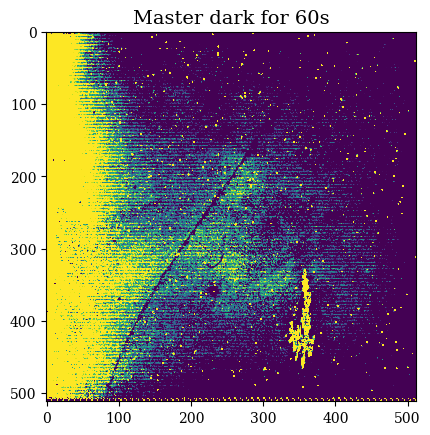

In [45]:
plt.imshow(mdark, vmin=np.median(mdark), vmax=np.median(mdark)*1.1)
plt.title('Master dark for 60s')

In [46]:
# c : correction
cjflatlist = np.array([fits.getdata(inim)-biaslevel-mdark*fits.getheader(inim)['exptime']/60 for inim in jflatimlist])
mjflat = np.median([data/np.median(data.flatten()) for data in cjflatlist], axis=0)

# c : correction
ckflatlist = np.array([fits.getdata(inim)-biaslevel-mdark*fits.getheader(inim)['exptime']/60 for inim in kflatimlist])
mkflat = np.median([data/np.median(data.flatten()) for data in ckflatlist], axis=0)

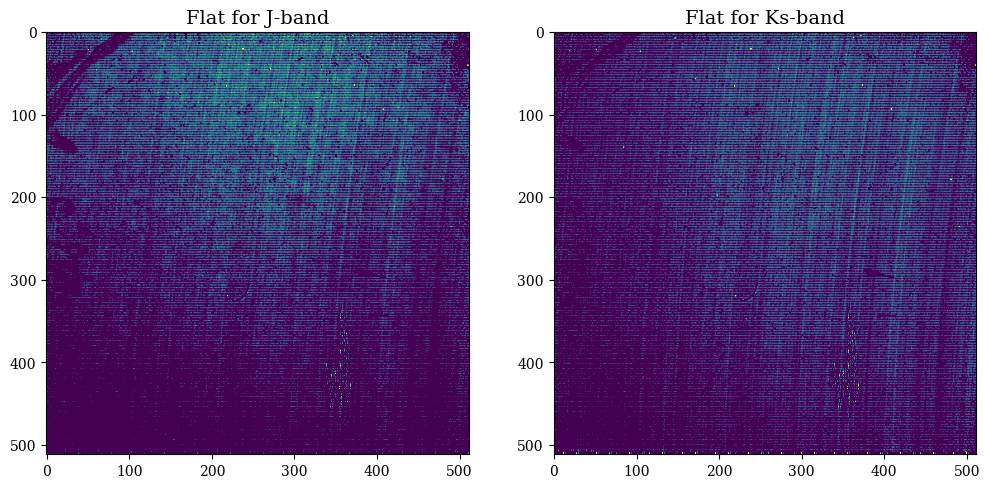

In [47]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(mjflat, vmin=np.median(mjflat), vmax=np.median(mjflat)*1.1)
plt.title('Flat for J-band')

plt.subplot(122)
plt.title('Flat for Ks-band')
plt.imshow(mkflat, vmin=np.median(mkflat), vmax=np.median(mkflat)*1.1)

# Pre-processing

- J-band

In [48]:
for inim in jobjimlist:

	obj, hdr = fits.getdata(inim, header=True)
	hdr['VACUUM'] = 0
	cobj = (fits.getdata(inim)-biaslevel-mdark)/mjflat
	ninim = f"{path_save}/Calib-{obs}-{hdr['object']}-{hdr['date-obs'].replace('-', '')}-{hdr['time-obs'].replace(':', '')}-{hdr['filter']}-{int(hdr['exptime'])}.fits"
	fits.writeto(ninim, cobj[0:503, :], header=hdr, overwrite=True)

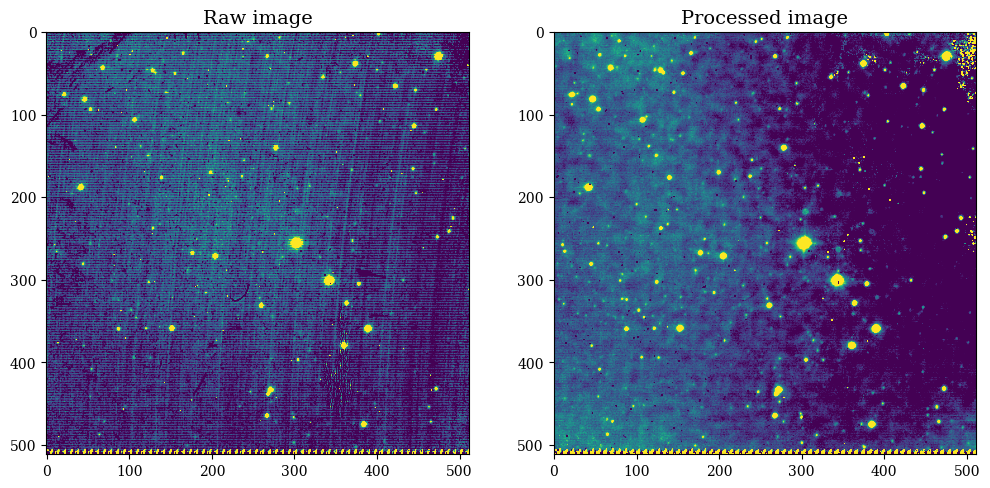

In [49]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Raw image')
plt.imshow(obj, vmin=np.median(obj.flatten())*0.99, vmax=np.median(obj.flatten())*1.05)
plt.subplot(122)
plt.title('Processed image')
plt.imshow(cobj, vmin=np.median(cobj.flatten())*0.99, vmax=np.median(cobj.flatten())*1.05)

- Ks-band

In [50]:
for inim in kobjimlist:

	obj, hdr = fits.getdata(inim, header=True)
	hdr['VACUUM'] = 0
	cobj = (fits.getdata(inim)-biaslevel-mdark)/mkflat
	ninim = f"{path_save}/Calib-{obs}-{hdr['object']}-{hdr['date-obs'].replace('-', '')}-{hdr['time-obs'].replace(':', '')}-{hdr['filter']}-{int(hdr['exptime'])}.fits"
	
	fits.writeto(ninim, cobj[0:503, :], header=hdr, overwrite=True)

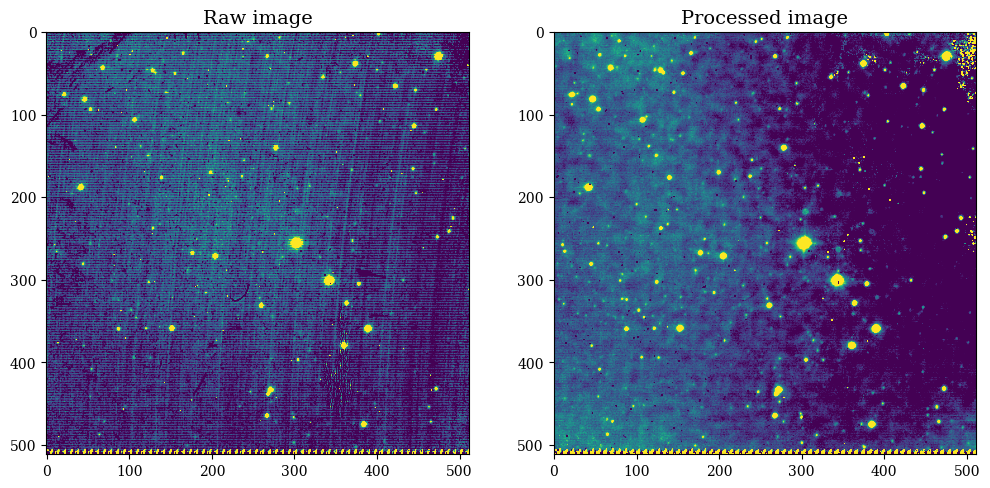

In [51]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Raw image')
plt.imshow(obj, vmin=np.median(obj.flatten())*0.99, vmax=np.median(obj.flatten())*1.05)
plt.subplot(122)
plt.title('Processed image')
plt.imshow(cobj, vmin=np.median(cobj.flatten())*0.99, vmax=np.median(cobj.flatten())*1.05)

# Sky Subtraction

In [52]:
imlist = sorted(glob.glob('../5.result/Calib*-J-*0.fits'))
imlist[:5]

['../5.result/Calib-BOAO-GRB221009A-20221018-113401-J-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221018-113526-J-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221018-113651-J-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221018-113815-J-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221018-113940-J-60.fits']

In [53]:
nn = 0
#	Dithering number
step = 7
partlist = imlist[nn:step*(nn+1)]
partlist

['../5.result/Calib-BOAO-GRB221009A-20221018-113401-J-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221018-113526-J-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221018-113651-J-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221018-113815-J-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221018-113940-J-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221018-114105-J-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221018-114230-J-60.fits']

In [54]:
ii = 0
sciim = partlist[ii]
skyimlist = [inim for ii, inim in enumerate(partlist) if ii != 0]
print(f"Sci image          : {sciim}")
print(f"Images for the sky : {skyimlist}")

Sci image          : ../5.result/Calib-BOAO-GRB221009A-20221018-113401-J-60.fits
Images for the sky : ['../5.result/Calib-BOAO-GRB221009A-20221018-113526-J-60.fits', '../5.result/Calib-BOAO-GRB221009A-20221018-113651-J-60.fits', '../5.result/Calib-BOAO-GRB221009A-20221018-113815-J-60.fits', '../5.result/Calib-BOAO-GRB221009A-20221018-113940-J-60.fits', '../5.result/Calib-BOAO-GRB221009A-20221018-114105-J-60.fits', '../5.result/Calib-BOAO-GRB221009A-20221018-114230-J-60.fits']


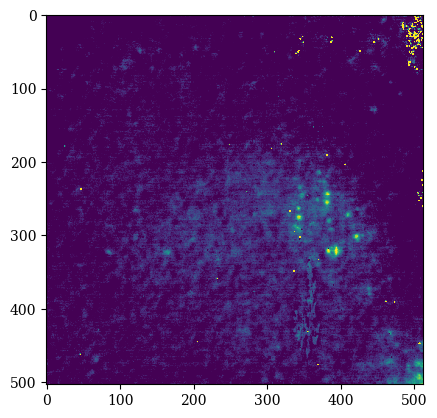

In [55]:
skyim = np.median([fits.getdata(inim) for inim in skyimlist], axis=0)
skymed = np.median(skyim.flatten())
plt.imshow(skyim, vmin=skymed, vmax=skymed*1.1)

# Bad mask

In [56]:
def badpixmask(darkname, flatname, outname='mask.fits'):
    """
    A python script to make a bad pixel mask file for xdimsum processing
    It automatically determines the range of pixel values for input images
    specfieid, and create bad pixel mask according to them.
    Usage: python xdimsum_make_badmask.py darkfile flatfile output_mask_name
    darkname : master dark file
    flatfile : master flat file
    Created     : 2012. 6. 5. Wonki Park
    Last updated: 2022.10.20. Gu Lim
    """
    #import pyfits
    import os, sys
    import numpy as np
    from astropy.io import fits
    # from pyraf import iraf
    import matplotlib.pyplot as plt
    # Cut limit
    DARKCUT = 1; FLATCUT = 2 # N number for N * sigma
    # Plot Drawing limit
    DRAW = 5
    # SAMPLING BIN size
    BINWIDTH=10
    inlist  = [darkname, flatname]
    """
    # Check the number of arguments, and distribute the arguments
    argnumber = len(sys.argv)
    print(argnumber)
    if argnumber != 4:
        print(" Not correct number of arguments were specified!")
        sys.exit(1)
    else:
        #darkname = sys.argv[1]
        #flatname = sys.argv[2]
        inlist = [darkname, flatname]
        outname = sys.argv[-1]
    """
    fig       = plt.figure()
    ax_list   = []
    mask_list = []
    idx       = 0
    # Now, for each argument, check the statistics
    for item in inlist:
        # Now, get the data
        # NOTE: data are read with 64bit format for correct stat calc.
        #data = pyfits.open(item)[0].data.astype(np.float64)
        data = fits.getdata(item).astype(np.float64)
        # Calculate the statistics of the data
        mean    = data.mean()
        median  = np.median(data)
        std     = data.std(ddof = 1)
        datamin = data.min()
        datamax = data.max()
        histbin = np.arange(datamin, datamax, BINWIDTH)
        ny, nx  = np.histogram(data, bins=histbin)
        if item == darkname:
            lthresh = mean - DARKCUT*std
            hthresh = mean + DARKCUT*std
        else:
            lthresh = mean - FLATCUT*std
            hthresh = mean + FLATCUT*std
        print(lthresh, hthresh)
        # Now, make mask for read data
        datamask = np.zeros(data.shape, dtype=int)
        badidx   = np.where( (data > hthresh) | (data <= lthresh) )
        goodidx  = np.where( (data <= hthresh) & (data > lthresh) )
        datamask[badidx]  = 0
        datamask[goodidx] = 1
        # Draw the figures
        idx += 1
        ax   = fig.add_subplot(len(inlist), 1, idx)
        plot = ax.step(nx[:-1], ny)
        ax.axvline(x=mean, linestyle="-", color="red")
        ax.axvline(x=median, linestyle="-", color="blue")
        ax.axvline(x=lthresh, linestyle="-", color="red")
        ax.axvline(x=hthresh, linestyle="-", color="red")
        ax.text(0.05, 1.04, item, ha="left", va="center", transform=ax.transAxes)
        if mean - datamin >= datamax - mean:
            xlow  = datamin
            xhigh = mean + DRAW*std
        else:
            xlow  = mean - DRAW*std
            xhigh = mean + 5*DRAW*std
        ax.set_xlim(xlow, xhigh)
        #ax.semilogy()
        ax_list.append(ax)
        mask_list.append(datamask)
    totalmask = (mask_list[0] * mask_list[1])
    maskhdu = fits.writeto(outname, totalmask.astype(np.int32), header=None, overwrite=True)
    # iraf.imcopy(outname, outname[:-4] + "pl")
    imcopycom = f"imcopy {outname} {outname.replace('fits', 'pl')}"
    os.system(imcopycom)
    plt.show()

-24.129945621956495 352.37815664352115
0.9081722434435032 1.097407277267347



FITSIO status = 105: couldn't create the named file
failed to create new file (already exists?):
../boao/1022/mask.Ks.pl


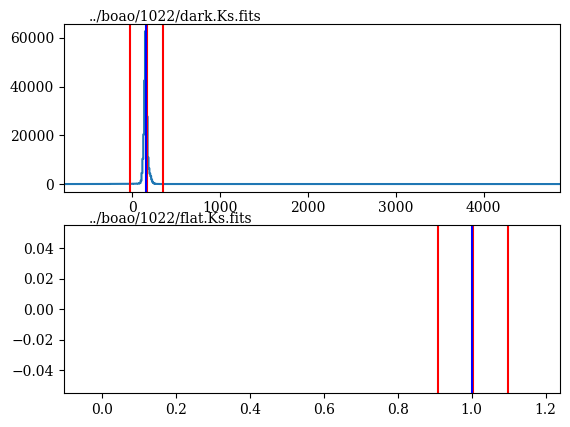

In [57]:
darkname = f'{path_save}/dark.Ks.fits'
fits.writeto(darkname, mdark[0:503, :], overwrite=True)

flatname = f'{path_save}/flat.Ks.fits'
fits.writeto(flatname, mkflat[0:503, :], overwrite=True)

badpixmask(darkname, flatname, outname=f'{path_save}/mask.Ks.fits')


FITSIO status = 105: couldn't create the named file
failed to create new file (already exists?):
../boao/1022/mask.J.pl


-24.129945621956495 352.37815664352115
0.895255664948941 1.1075318539373797


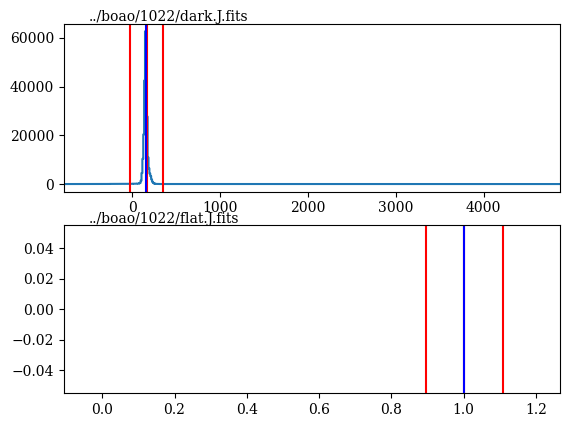

In [58]:
darkname = f'{path_save}/dark.J.fits'
fits.writeto(darkname, mdark[0:503, :], overwrite=True)

flatname = f'{path_save}/flat.J.fits'
fits.writeto(flatname, mjflat[0:503, :], overwrite=True)

badpixmask(darkname, flatname, outname=f'{path_save}/mask.J.fits')

# xmosaic command

In [59]:
def find_med_dateobs(imlist):
	from astropy.time import Time
	medjd = np.median([fits.getheader(inim)['JD'] for inim in imlist])
	return Time(medjd, format='jd').isot

In [60]:
def generate_comim_format(imlist):
	hdr = fits.getheader(imlist[0])
	dateobs = find_med_dateobs(imlist)
	exptime = int(np.sum([fits.getheader(inim)['EXPTIME'] for inim in imlist]))
	date_ = dateobs.split('T')[0].replace('-', '')
	time_ = dateobs.split('T')[1].replace(':', '')[:6]
	ninim = f"Calib-{hdr['OBSERVAT']}-{hdr['OBJECT']}-{date_}-{time_}-{hdr['FILTER']}-{exptime}.com.fits"
	return ninim

In [61]:
filte = 'Ks'
#	Processed image
cimlist = sorted(glob.glob(f'{path_save}/Calib*-{filte}*0.fits'))
#	xmosaic list
f = open(f'{path_save}/xmosaic.{filte}.list', 'w')
for inim in cimlist:
	f.write(f"{os.path.basename(inim)}\n")
f.close()
#	new image
ninim = f"{path_save}/{generate_comim_format(cimlist)}"
#	command
com = f"""xmosaic @xmosaic.{filte}.list reference='' output='{generate_comim_format(cimlist)}' expmap='.exp' nsigrej=3.0 maxiter=5  bpmask='mask.{filte}.fits' nskymin=3 nmean=7 fp_xslm+ fp_maskfix+ fp_xzap- fp_badpixupdate+ fp_mkshifts+ fp_xnregistar+ mp_mkmask+ nskymin=5 cache- mp_mag=1  shiftlist='xmosaic.{filte}.slist'"""
print(com)

xmosaic @xmosaic.Ks.list reference='' output='Calib-BOAO-GRB221009A-20221022-093933-Ks-1680.com.fits' expmap='.exp' nsigrej=3.0 maxiter=5  bpmask='mask.Ks.fits' nskymin=3 nmean=7 fp_xslm+ fp_maskfix+ fp_xzap- fp_badpixupdate+ fp_mkshifts+ fp_xnregistar+ mp_mkmask+ nskymin=5 cache- mp_mag=1  shiftlist='xmosaic.Ks.slist'


In [62]:
filte = 'J'
#	Processed image
cimlist = sorted(glob.glob(f'{path_save}/Calib*-{filte}*0.fits'))
#	xmosaic list
f = open(f'{path_save}/xmosaic.{filte}.list', 'w')
for inim in cimlist:
	f.write(f"{os.path.basename(inim)}\n")
f.close()
#	new image
ninim = f"{path_save}/{generate_comim_format(cimlist)}"
#	command
com = f"""xmosaic @xmosaic.{filte}.list reference='' output='{generate_comim_format(cimlist)}' expmap='.exp' nsigrej=3.0 maxiter=5  bpmask='mask.{filte}.fits' nskymin=3 nmean=7 fp_xslm+ fp_maskfix+ fp_xzap- fp_badpixupdate+ fp_mkshifts+ fp_xnregistar+ mp_mkmask+ nskymin=5 cache- mp_mag=1  shiftlist='xmosaic.{filte}.slist'"""
print(com)

IndexError: list index out of range